Sobel Operator

Without resizing the image

<>:43: SyntaxWarning: invalid escape sequence '\B'
<>:43: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_14052\3087239995.py:43: SyntaxWarning: invalid escape sequence '\B'
  input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path


sobel edge detection output
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   7  11  13  17  49  58  40   4  13   3  21  44  48   0]
 [  0  23  17  11  38  44  22   6  14  25  30  39  34  10  20   0]
 [  0  30  23  31  80  62  57  82 108  99  86  89  89  70  25   0]
 [  0  23  33  55  80  46  78 141 153 146 105  62  65  79  33   0]
 [  0  31  20  43  79  87 143 148 121 134 123  75  62  52  46   0]
 [  0  32  44  42 106 147 136 114  74  60 138 129  50  19  41   0]
 [  0  20  46  73 136 160  86  55  37  92 155 131  53  28  18   0]
 [  0  42  43  72 157 179 117  75  92 134 164 142  71  38  31   0]
 [  0  22   7  53 160 201 129  26  80 127 169 158  78  10  21   0]
 [  0  44  48  56 141 233 255 237 248 244 213 126  41  22   6   0]
 [  0  21   7  16  61 146 211 211 175 130  88  34  12  15  11   0]
 [  0  33  19   6   5  24  62  87  60  18  37  27  25  22  20   0]
 [  0  24  19  19  16  14  17  30  47  21  31  48  30  12  27   0]
 [  0   0   0   0   0   0   0   0

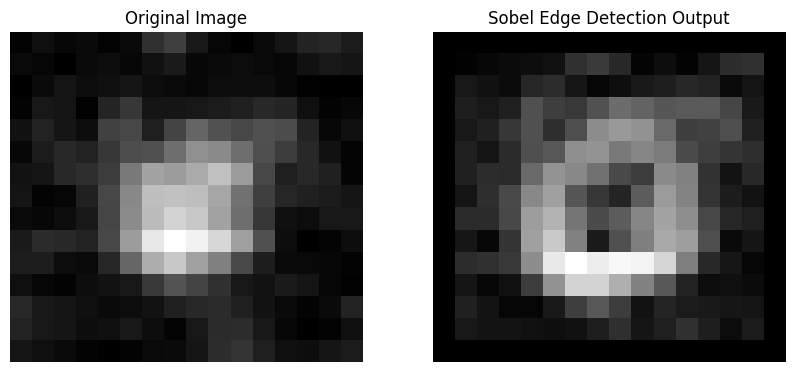

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt  # Importing matplotlib for displaying images

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    # Get image dimensions
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Output image (zero padded to keep the same size)
    output_image = np.zeros((height, width))
    
    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path
image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the output image for better visualization
normalized_output = normalize_image(sobel_magnitude)
print("sobel edge detection output\n",normalized_output)

# Convert to PIL Image
output_image = Image.fromarray(normalized_output)

# Save the output image
output_image.save('sobel_edge_detection_output.png')
print("Sobel edge detection output saved as 'sobel_edge_detection_output.png'")

# Display the original and the output image using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes

# Display Sobel output image
plt.subplot(1, 2, 2)
plt.title("Sobel Edge Detection Output")
plt.imshow(normalized_output, cmap='gray')
plt.axis('off')  # Hide axes

plt.show()  # Show the figure with both images


After resizing 

<>:39: SyntaxWarning: invalid escape sequence '\B'
<>:39: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_14052\2391629694.py:39: SyntaxWarning: invalid escape sequence '\B'
  input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path


Sobel edge detection output saved as 'sobel_edge_detection_output.png'


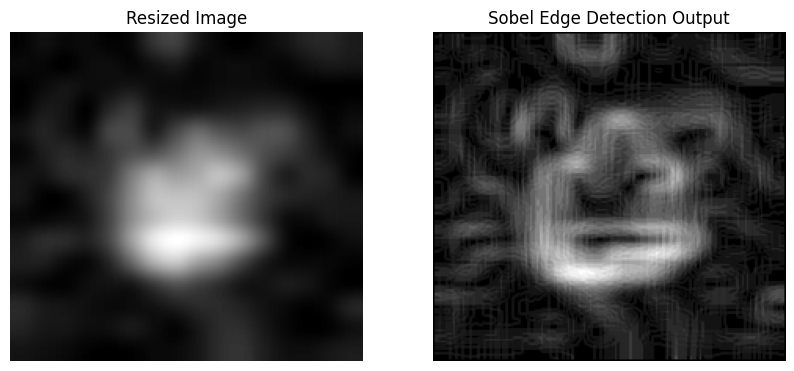

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    height, width = image.shape
    output_image = np.zeros((height, width))
    
    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path
image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Resize the image to a width of 225 pixels
new_width = 225
aspect_ratio = image.height / image.width
new_height = int(new_width * aspect_ratio)
image_resized = image.resize((new_width, new_height))

# Convert the resized image to a NumPy array
image_array = np.array(image_resized)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the output image for better visualization
normalized_output = normalize_image(sobel_magnitude)

# Convert to PIL Image
output_image = Image.fromarray(normalized_output)

# Save the output image
output_image.save('sobel_edge_detection_output.png')
print("Sobel edge detection output saved as 'sobel_edge_detection_output.png'")

# Display the original resized and the output image using matplotlib
plt.figure(figsize=(10, 5))

# Display original resized image
plt.subplot(1, 2, 1)
plt.title("Resized Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes

# Display Sobel output image
plt.subplot(1, 2, 2)
plt.title("Sobel Edge Detection Output")
plt.imshow(normalized_output, cmap='gray')
plt.axis('off')  # Hide axes

plt.show()  # Show the figure with both images


Sobel combined edge-detection

Combined Sobel edge detection output saved as 'sobel_edge_detection_combined_output.png'


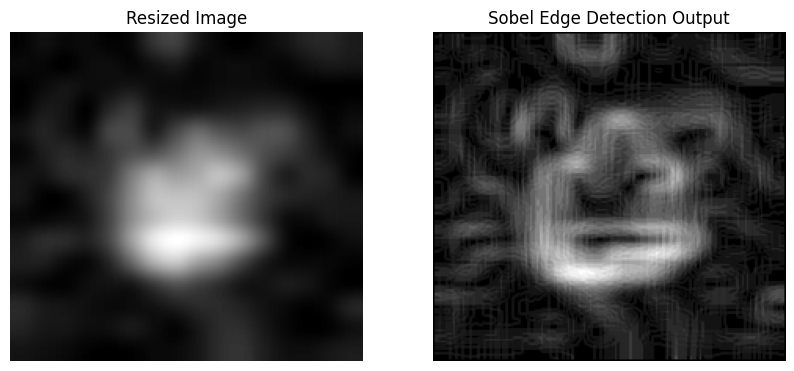

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Function to apply combined Sobel operator
def apply_sobel_combined(image):
    height, width = image.shape
    output_image = np.zeros((height, width))
    
    # Apply convolution and compute gradient magnitude
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            gx = np.sum(region * sobel_x)  # Apply Sobel x kernel
            gy = np.sum(region * sobel_y)  # Apply Sobel y kernel
            output_image[i, j] = np.sqrt(gx**2 + gy**2)  # Gradient magnitude
    
    return output_image

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = 'test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg'  # Change this to your image path
image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Resize the image to a width of 225 pixels
new_width = 225
aspect_ratio = image.height / image.width
new_height = int(new_width * aspect_ratio)
image_resized = image.resize((new_width, new_height))

# Convert the resized image to a NumPy array
image_array = np.array(image_resized)

# Apply combined Sobel operator
sobel_combined_output = apply_sobel_combined(image_array)

# Normalize the output image for better visualization
normalized_output = normalize_image(sobel_combined_output)

# Convert to PIL Image
output_image = Image.fromarray(normalized_output)

# Save the output image
output_image.save('sobel_edge_detection_combined_output.png')
print("Combined Sobel edge detection output saved as 'sobel_edge_detection_combined_output.png'")

# Display the original resized and the output image using matplotlib
plt.figure(figsize=(10, 5))

# Display original resized image
plt.subplot(1, 2, 1)
plt.title("Resized Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes

# Display Sobel output image
plt.subplot(1, 2, 2)
plt.title("Sobel Edge Detection Output")
plt.imshow(normalized_output, cmap='gray')
plt.axis('off')  # Hide axes

plt.show()  # Show the figure with both images


Local Binary Pattern

Without using library

<>:64: SyntaxWarning: invalid escape sequence '\B'
<>:64: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_18584\1806030964.py:64: SyntaxWarning: invalid escape sequence '\B'
  input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path


Sobel and LBP outputs saved as 'sobel_edge_detection_output.png' and 'lbp_output.png'


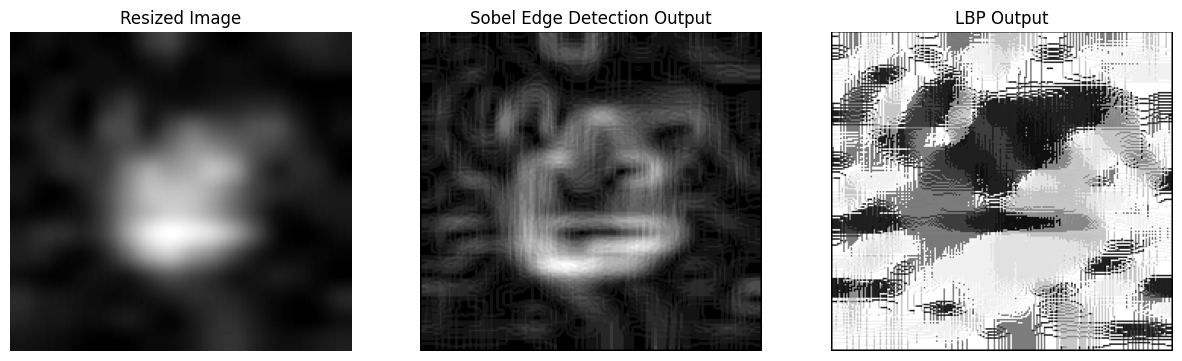

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    height, width = image.shape
    output_image = np.zeros((height, width))
    
    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Function to compute Local Binary Pattern (LBP)
def compute_lbp(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            center_pixel = image[i, j]
            binary_string = ''
            
            # Clockwise comparison of the 8 neighbors starting from the top-left
            binary_string += '1' if image[i-1, j-1] >= center_pixel else '0'
            binary_string += '1' if image[i-1, j] >= center_pixel else '0'
            binary_string += '1' if image[i-1, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j-1] >= center_pixel else '0'
            binary_string += '1' if image[i, j-1] >= center_pixel else '0'
            
            # Convert binary string to decimal and assign to the LBP image
            lbp_image[i, j] = int(binary_string, 2)
    
    return lbp_image

# Load your image 
input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path
image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Resize the image to a width of 225 pixels
new_width = 225
aspect_ratio = image.height / image.width
new_height = int(new_width * aspect_ratio)
image_resized = image.resize((new_width, new_height))

# Convert the resized image to a NumPy array
image_array = np.array(image_resized)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the Sobel output image for better visualization
normalized_sobel_output = normalize_image(sobel_magnitude)

# Compute Local Binary Pattern (LBP)
lbp_image = compute_lbp(image_array)

# Normalize the LBP output for better visualization
normalized_lbp_output = normalize_image(lbp_image)

# Convert to PIL Image
sobel_output_image = Image.fromarray(normalized_sobel_output)
lbp_output_image = Image.fromarray(normalized_lbp_output)

# Save the Sobel and LBP output images
sobel_output_image.save('sobel_edge_detection_output.png')
lbp_output_image.save('lbp_output.png')
print("Sobel and LBP outputs saved as 'sobel_edge_detection_output.png' and 'lbp_output.png'")

# Display the original resized, Sobel output, and LBP output images using matplotlib
plt.figure(figsize=(15, 5))

# Display original resized image
plt.subplot(1, 3, 1)
plt.title("Resized Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes

# Display Sobel output image
plt.subplot(1, 3, 2)
plt.title("Sobel Edge Detection Output")
plt.imshow(normalized_sobel_output, cmap='gray')
plt.axis('off')  # Hide axes

# Display LBP output image
plt.subplot(1, 3, 3)
plt.title("LBP Output")
plt.imshow(normalized_lbp_output, cmap='gray')
plt.axis('off')  # Hide axes

plt.show()  # Show the figure with all images


    With using library

    With histogram using LBP texture operator

<>:70: SyntaxWarning: invalid escape sequence '\B'
<>:70: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_18584\1664016175.py:70: SyntaxWarning: invalid escape sequence '\B'
  input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path


Sobel and LBP outputs saved as 'sobel_edge_detection_output.png' and 'lbp_output.png'


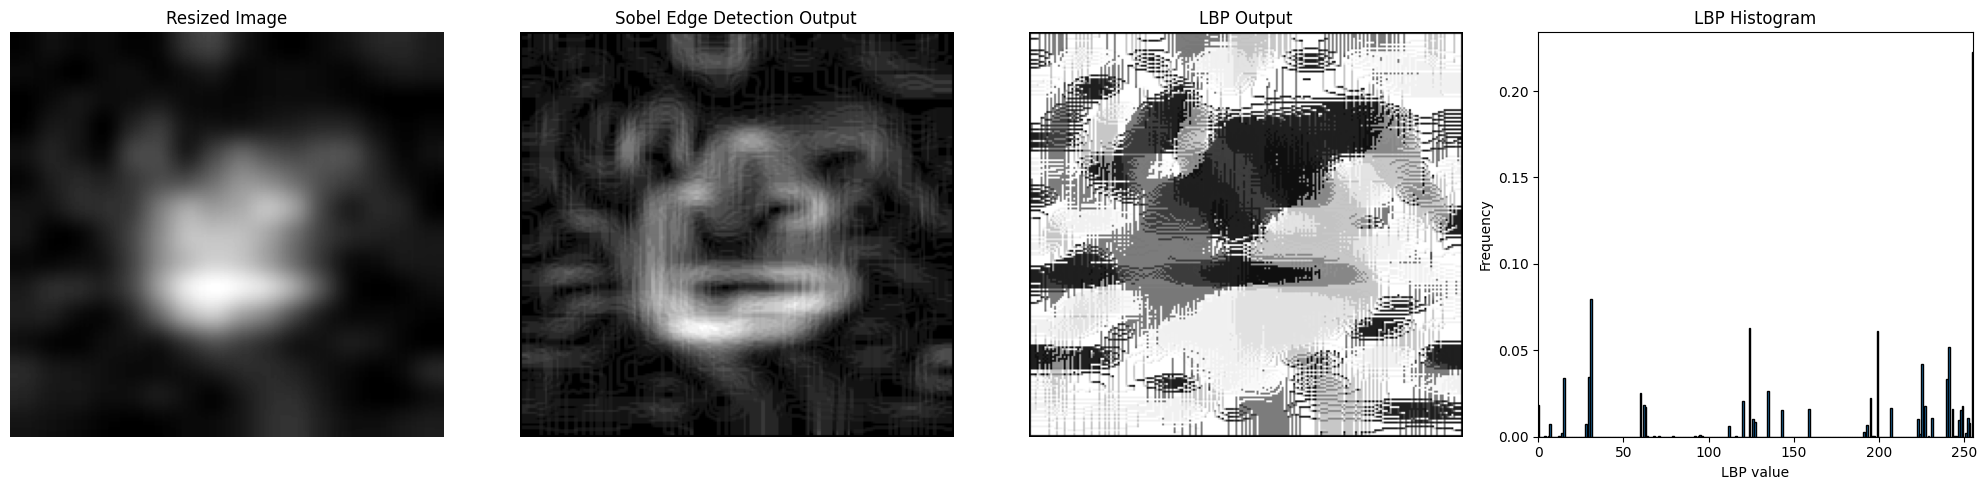

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    height, width = image.shape
    output_image = np.zeros((height, width))
    
    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Function to compute Local Binary Pattern (LBP)
def compute_lbp(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):#dont need to include borders
        for j in range(1, width-1):
            center_pixel = image[i, j]
            binary_string = ''
            
            # Clockwise comparison of the 8 neighbors starting from the top-left
            binary_string += '1' if image[i-1, j-1] >= center_pixel else '0'
            binary_string += '1' if image[i-1, j] >= center_pixel else '0'
            binary_string += '1' if image[i-1, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j+1] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j] >= center_pixel else '0'
            binary_string += '1' if image[i+1, j-1] >= center_pixel else '0'
            binary_string += '1' if image[i, j-1] >= center_pixel else '0'
            
            # Convert binary string to decimal and assign to the LBP image
            lbp_image[i, j] = int(binary_string, 2)
    
    return lbp_image

# Function to compute the histogram of LBP values
def compute_lbp_histogram(lbp_image):
    # LBP values range from 0 to 255 (8-bit pattern)
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(257), density=True)
    return hist

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Change this to your image path
image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Resize the image to a width of 225 pixels
new_width = 225
aspect_ratio = image.height / image.width
new_height = int(new_width * aspect_ratio)
image_resized = image.resize((new_width, new_height))

# Convert the resized image to a NumPy array
image_array = np.array(image_resized)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the Sobel output image for better visualization
normalized_sobel_output = normalize_image(sobel_magnitude)

# Compute Local Binary Pattern (LBP)
lbp_image = compute_lbp(image_array)

# Normalize the LBP output for better visualization
normalized_lbp_output = normalize_image(lbp_image)

# Compute the LBP histogram
lbp_histogram = compute_lbp_histogram(lbp_image)

# Convert to PIL Image
sobel_output_image = Image.fromarray(normalized_sobel_output)
lbp_output_image = Image.fromarray(normalized_lbp_output)

# Save the Sobel and LBP output images
sobel_output_image.save('sobel_edge_detection_output.png')
lbp_output_image.save('lbp_output.png')
print("Sobel and LBP outputs saved as 'sobel_edge_detection_output.png' and 'lbp_output.png'")

# Display the original resized, Sobel output, LBP output images, and LBP histogram using matplotlib
plt.figure(figsize=(20, 5))

# Display original resized image
plt.subplot(1, 4, 1)
plt.title("Resized Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes

# Display Sobel output image
plt.subplot(1, 4, 2)
plt.title("Sobel Edge Detection Output")
plt.imshow(normalized_sobel_output, cmap='gray')
plt.axis('off')  # Hide axes

# Display LBP output image
plt.subplot(1, 4, 3)
plt.title("LBP Output")
plt.imshow(normalized_lbp_output, cmap='gray')
plt.axis('off')  # Hide axes

# Display LBP histogram
plt.subplot(1, 4, 4)
plt.title("LBP Histogram")
plt.bar(np.arange(256), lbp_histogram, width=1, edgecolor='black')
plt.xlim([0, 255])
plt.xlabel('LBP value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()  # Show the figure with all images and the histogram
